<a href="https://colab.research.google.com/github/Ritikkumar9828155803/Ritik-Kumar_24-27-20/blob/main/ASSN3_RITIK_KUMAR_24_27_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RITIK KUMAR, M.TECH DATA SCIENCE,  24-27-20**

## To implement this, we will create a linear regression model using the Maximum Likelihood Estimation (MLE) for parameter 𝜃,calculated through the normal equation. In this approach, θ is estimated by


## $(X^{T}X)^{-1}X^{T}Y$

## Function : compute_mle_theta calculates the MLE for θ using the normal equation.

## Data Generation: X is generated using np.linspace, and y is created as a linear relationship with some added noise.

## Prediction: We use the estimated theta to calculate predicted values, y_pred.

## Plotting: The scatter plot shows the original data, and the line plot shows the fitted linear regression model.

## This will plot the line of best fit against the input data, illustrating the predicted values based on the MLE estimate of 𝜃.

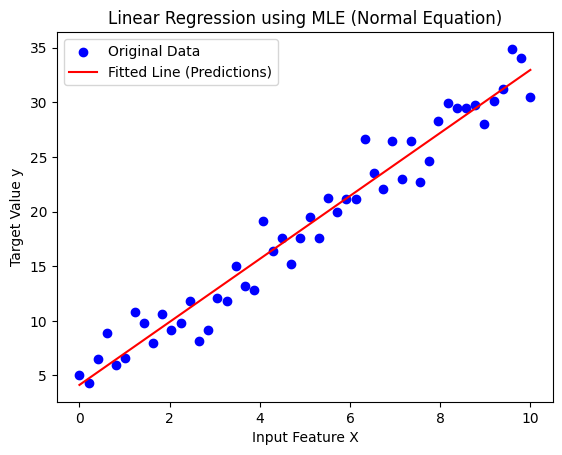

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def compute_mle_theta(X, y):

    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 3 * X + 4 + np.random.randn(50) * 2
theta = compute_mle_theta(X, y)

X_b = np.c_[np.ones((X.shape[0], 1)), X]
y_pred = X_b.dot(theta)

plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label='Fitted Line (Predictions)')
plt.xlabel('Input Feature X')
plt.ylabel('Target Value y')
plt.legend()
plt.title('Linear Regression using MLE (Normal Equation)')
plt.show()

## Linear Regression:
## We calculate theta_linear for the linear model using the previous function, compute_mle_theta.
## Predictions y_pred_linear are computed using this theta_linear.

## Polynomial Regression:
## We create X_poly, which includes the original feature X and its squared term $X^{2}$, enabling us to fit a quadratic (degree 2) model.
## We calculate theta_poly by fitting this transformed feature matrix using the same normal equation function.
## Predictions y_pred_poly are obtained using theta_poly.

## Plotting:
## The plot shows both the linear regression hypothesis (red line) and the polynomial regression hypothesis (green line) against the original data (blue points).

## This visualization will highlight how polynomial regression can capture more complex patterns in the data compared to simple linear regression.

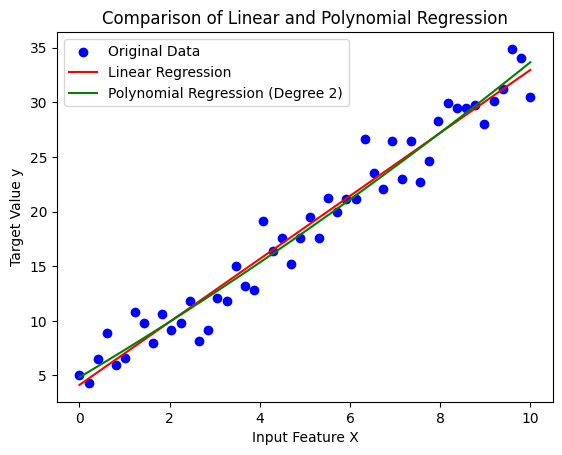

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def compute_mle_theta(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 3 * X.squeeze() + 4 + np.random.randn(50) * 2
theta_linear = compute_mle_theta(X, y)
X_b_linear = np.c_[np.ones((X.shape[0], 1)), X]
y_pred_linear = X_b_linear.dot(theta_linear)
X_poly = np.c_[X, X**2]
theta_poly = compute_mle_theta(X_poly, y)
X_b_poly = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]
y_pred_poly = X_b_poly.dot(theta_poly)
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred_linear, color='red', label='Linear Regression')
plt.plot(X, y_pred_poly, color='green', label='Polynomial Regression (Degree 2)')
plt.xlabel('Input Feature X')
plt.ylabel('Target Value y')
plt.legend()
plt.title('Comparison of Linear and Polynomial Regression')
plt.show()


## Outlier Introduction:
## We added a few extreme y values as outliers.

## Effect on Linear Regression:
## We trained a linear regression model on the data with outliers, showing how the model's fit is skewed due to these outliers.

## Outlier Detection and Removal:
## We used the Z-score method to detect outliers: data points with a Z-score higher than the threshold (here, 2) are considered outliers.
## We removed the outliers before fitting the regression model again, resulting in a better fit.

## This approach provides a clean, outlier-free dataset to train on, which should result in more reliable model performance.

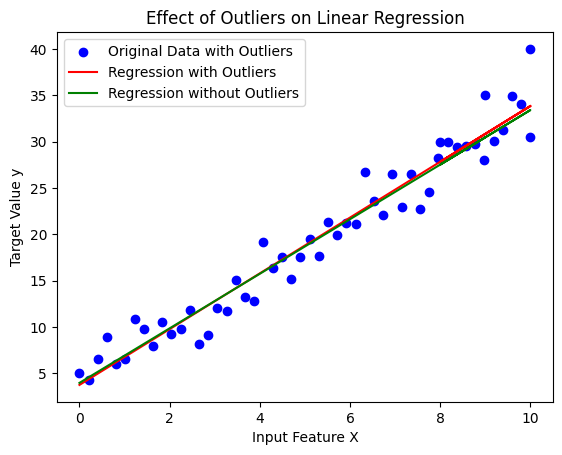

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def compute_mle_theta(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 3 * X.squeeze() + 4 + np.random.randn(50) * 2

X_outliers = np.append(X, [[8], [9], [10]], axis=0)
y_outliers = np.append(y, [30, 35, 40])

theta_outliers = compute_mle_theta(X_outliers, y_outliers)
X_b_outliers = np.c_[np.ones((X_outliers.shape[0], 1)), X_outliers]
y_pred_outliers = X_b_outliers.dot(theta_outliers)

z_scores = np.abs(stats.zscore(y_outliers))
threshold = 2
non_outlier_indices = np.where(z_scores < threshold)[0]


X_filtered = X_outliers[non_outlier_indices]
y_filtered = y_outliers[non_outlier_indices]

theta_filtered = compute_mle_theta(X_filtered, y_filtered)
X_b_filtered = np.c_[np.ones((X_filtered.shape[0], 1)), X_filtered]
y_pred_filtered = X_b_filtered.dot(theta_filtered)
plt.scatter(X_outliers, y_outliers, color='blue', label='Original Data with Outliers')
plt.plot(X_outliers, y_pred_outliers, color='red', label='Regression with Outliers')
plt.plot(X_filtered, y_pred_filtered, color='green', label='Regression without Outliers')
plt.xlabel('Input Feature X')
plt.ylabel('Target Value y')
plt.legend()
plt.title('Effect of Outliers on Linear Regression')
plt.show()
